# CONVOLUTIONAL NEURAL NETWORKS (PREDICTIVE ANALYTICS)
## Image Classification Using Fashion MNIST Dataset and Keras.

### BAN6420 Module 6 Assignment
### Voke Harrison Edafejimue
### Learner ID - 143304

In [100]:
#import the required libraries, data, model, layers, optimizer, and classes.

from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [102]:
#Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


##### The Fashion MNIST dataset contains;
##### *60,000 training examples
##### *10,000 testing examples
##### *10 classes
##### *28×28 grayscale images

## Data Visualization

In [104]:
# Display sample images from the fashin mnist dataset

for i in range(1,10):
    #Create a 3x3 grid with images
    plt.subplot(3,3,i)
    # Insert ith image with the color map 'gray'.
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [106]:
# Reshape the dataset by converting the images to 3-channel images, add an empty colour dimension to the dataset.
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)
print(testX.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Convlutional Neural Networks(CNN) with 6 layers

In [108]:
# Define the model architecture with 6 layers
def model_arch():
    models = Sequential()
    # Filter with a kernel size of 5x5
    models.add(Conv2D(64,(5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)))
    # Max Pooling to reduce the size of the kernel to 2x2.
    models.add(MaxPooling2D(pool_size=(2, 2)))
    # Filter with a kernel size of 5x5 again
    models.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
    # Max Pooling to reduce the size of the kernel to 2x2 again.
    models.add(MaxPooling2D(pool_size=(2, 2)))
    # Once the convolutional and pooling operations are done
    # the layer is flattened and fully connected layers are added.
    models.add(Flatten())
    #models.add(Dense(256, activation="relu"))
    #Finally a softmax activation
    models.add(Dense(10, activation="softmax"))
    return models

In [110]:
# Compile and Build the model
model = model_arch()
# Use the Adam Optimizer to achieve learning rates with minimum loss.
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
# Display a summary of the Model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
# Train the Model.
# We will train the model for 5 Epochs.

history = model.fit(trainX, trainy, epochs=5, validation_data=(testX, testy))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 1.9694 - sparse_categorical_accuracy: 0.8036 - val_loss: 0.3547 - val_sparse_categorical_accuracy: 0.8763
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.3105 - sparse_categorical_accuracy: 0.8882 - val_loss: 0.3123 - val_sparse_categorical_accuracy: 0.8885
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.2983 - sparse_categorical_accuracy: 0.8921 - val_loss: 0.3363 - val_sparse_categorical_accuracy: 0.8771
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: 0.2769 - sparse_categorical_accuracy: 0.8992 - val_loss: 0.3256 - val_sparse_categorical_accuracy: 0.8879
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: 0.2690 - sparse_categorical_accuracy: 0.9027 - val_loss: 0.3449 - val_sparse_categorical_accuracy: 0.8825


#### Observations from training
##### Our model achieves the following performance benchmarks:
##### Training accuracy - 90%
##### Training loss - 26%
##### Validation accuracy - 88%
##### Validation loss - 34%

## Model Analysis

In [114]:
# Accuracy Vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

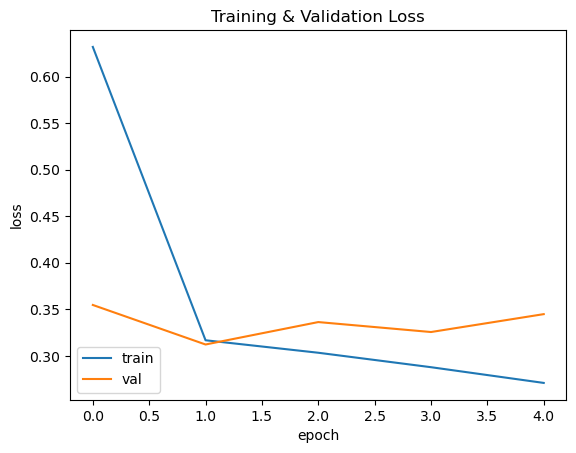

In [116]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

#### Interpretation
#### Towards the end the training accuracy is higher than validation accuracy and training loss is lower than validation loss.

## Predictions

In [156]:
# Use the trained CNN model to predict the class probabilities for the test images
probabilities = model.predict(testX)

# Determine the predicted class by finding the index of maximum probability
predicted_classes = np.argmax(probabilities, axis=1)

# Display the predicted classes for the test images
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

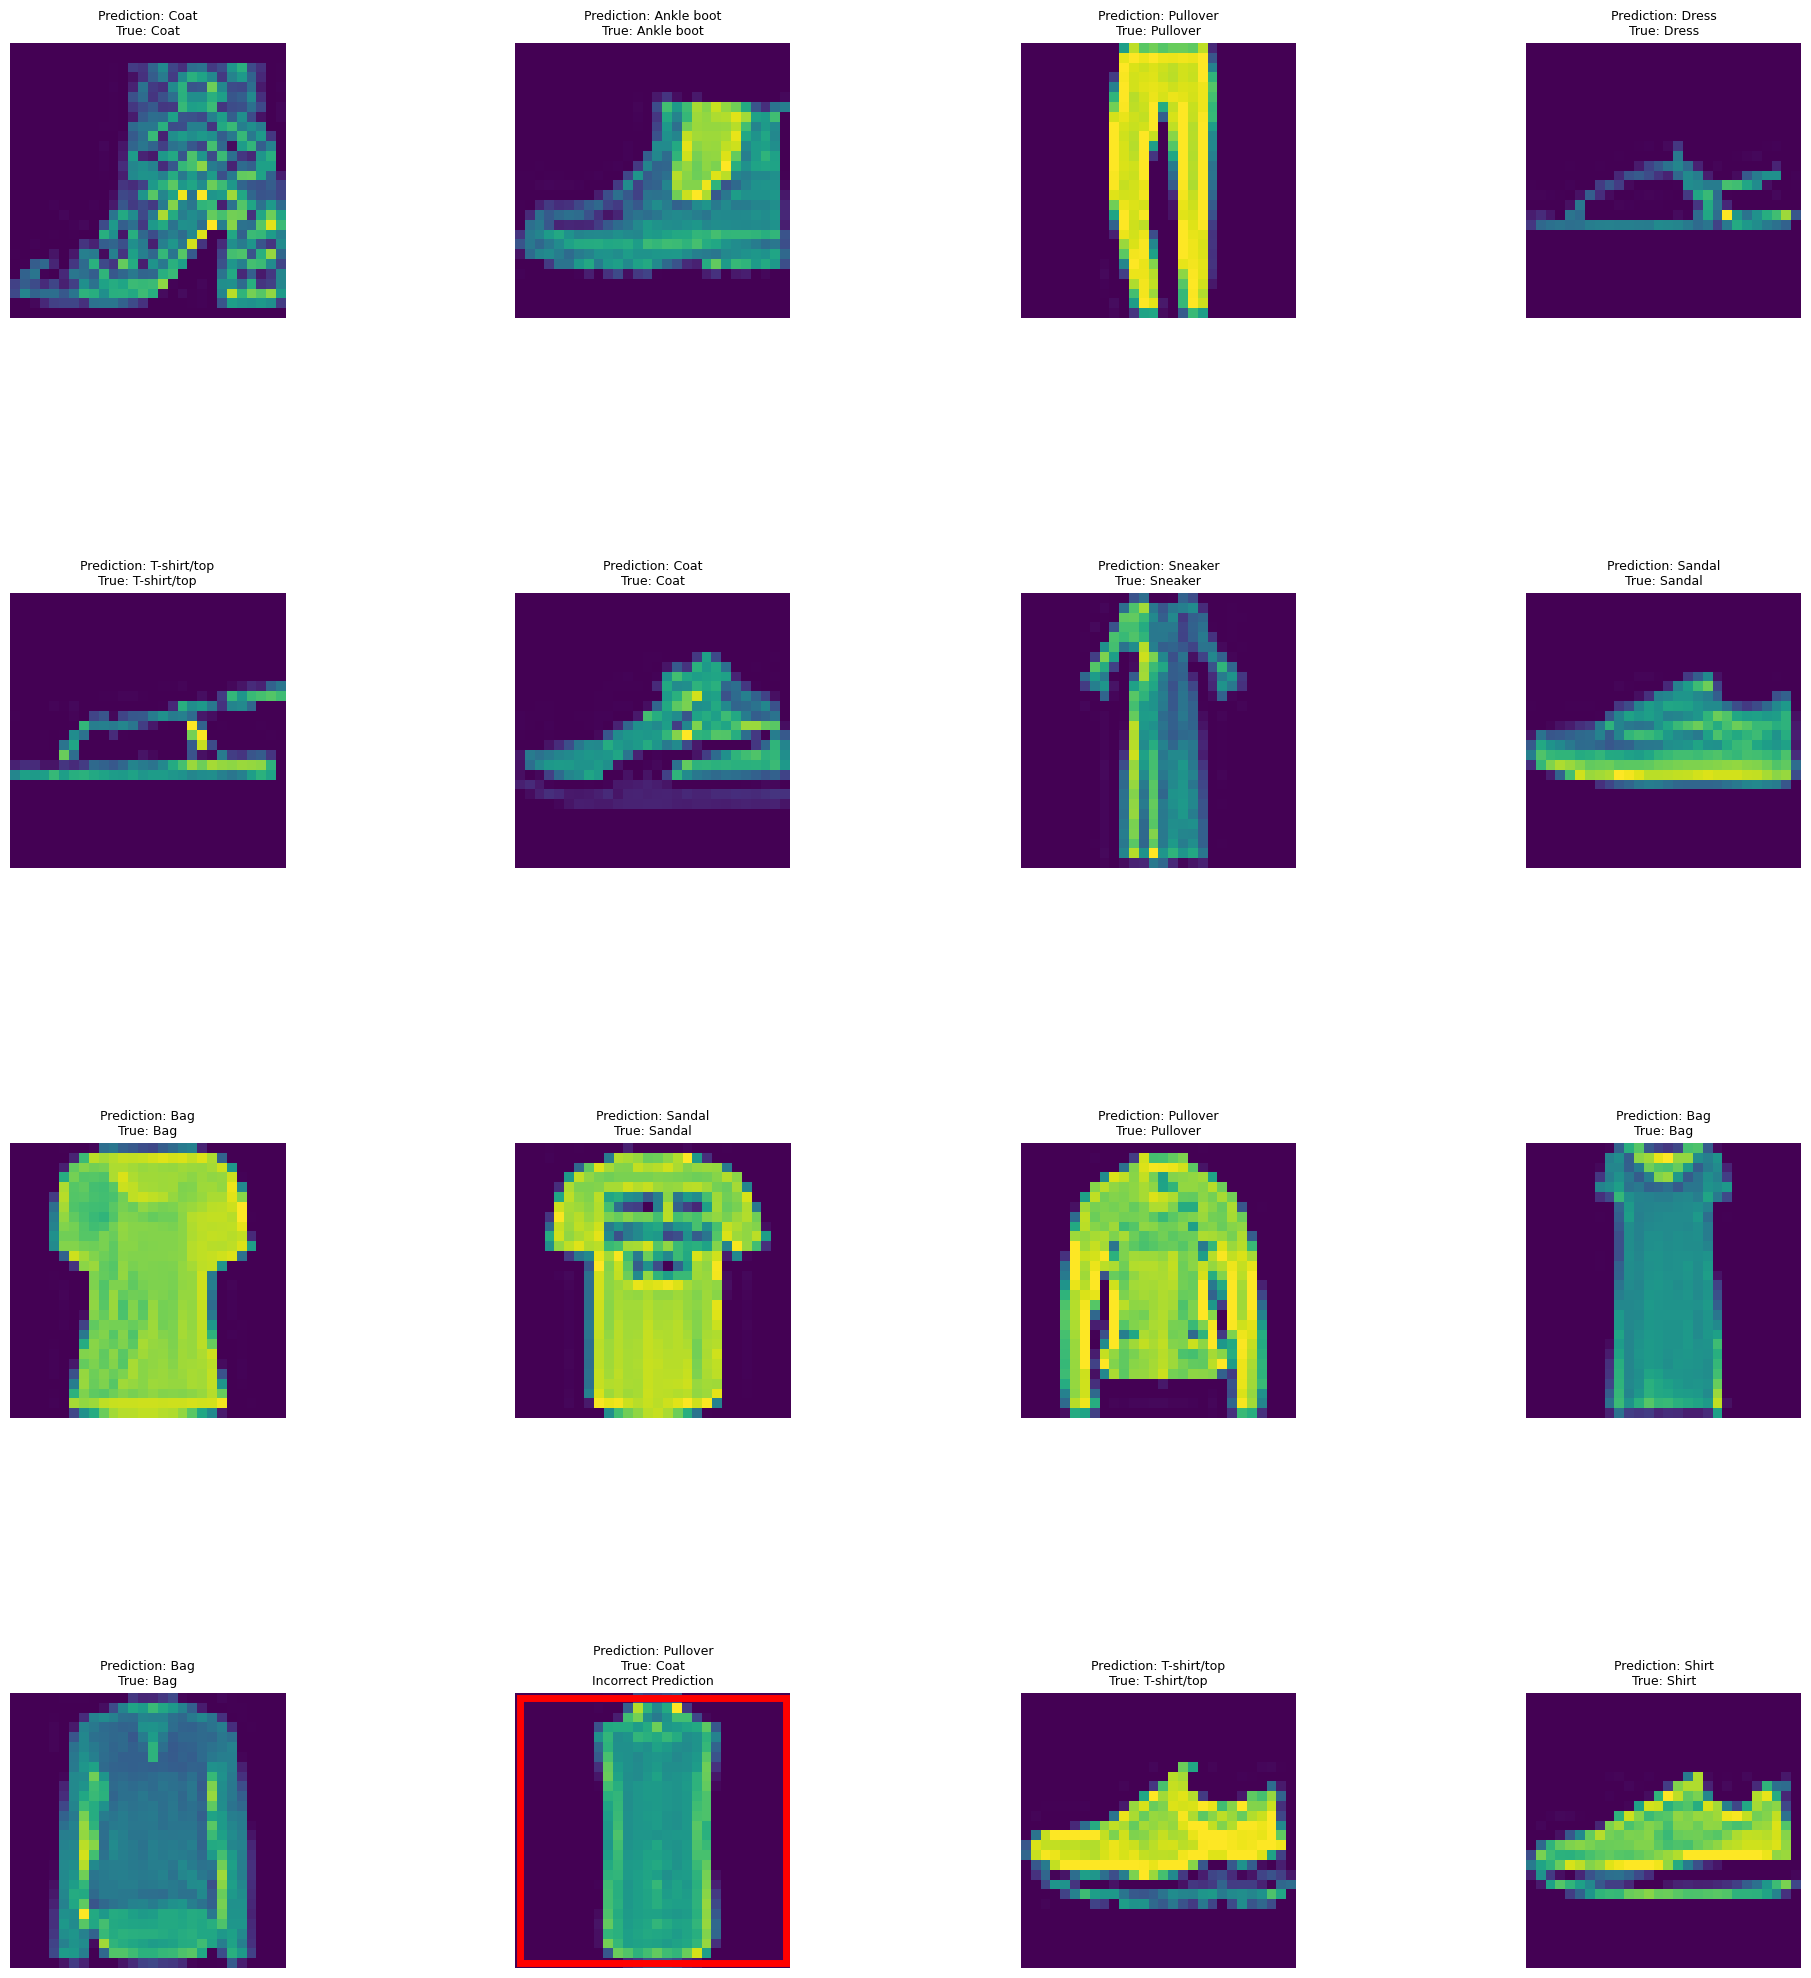

In [162]:
# Define the label names for the Fashion-MNIST dataset
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
# Define the grid size for display
W_grid = 4
L_grid = 4

# Create a grid of subplots
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel() # Flatten the 10x10 grid into 100 elements to easily loop through

# Get the total number of testing images
n_testing = len(testX)


# Iterate over the axes to plot individual images and titles
for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0, n_testing) # Randomly pick an index from the testing set
    axes[i].imshow(trainX[index]) # Display image at that index
    
    title = f"Prediction: {label_names[predicted_classes[index]]}\nTrue: {label_names[testy[index]]}"
    
    if predicted_classes[index] != testy[index]:
        title += "\nIncorrect Prediction"
        # Draw a rectangle around the subplot
        rect = patches.Rectangle((0,0), 27, 27, linewidth=5, edgecolor='red', facecolor='none')
        axes[i].add_patch(rect)
        
    axes[i].set_title(title, fontsize=9)
    axes[i].axis('off') # Turn off the axis

# Adjust the spacing between the plots
plt.subplots_adjust(hspace=1)
    

##### Interpretation
##### Incorrect predictions are highlighted in red.